# The Crypto Sentiment Analysis Project
## Step 1: Data Acquisition


The dataset was retrieved from [data.world's](https://data.world/) collection of datasets related to cryptocurrency. This platform serves as a valuable resource for accessing and sharing datasets, making it an ideal choice for obtaining data for analytical projects.

The decision to focus on the pre-COVID-19 era is deliberate, aiming to capture sentiments and trends in the cryptocurrency space before the notable events that unfolded during the pandemic.

In the subsequent steps of the project, we will explore this dataset, perform sentiment analysis using Python libraries, and visualize the results to gain insights into the sentiment landscape surrounding cryptocurrency tweets before the pandemic.

# Step 2: Data Processing and Cleaning

In this section, we delve into the data processing and cleaning steps for our cryptocurrency sentiment analysis project. It's worth noting that the dataset we retrieved from [data.world](https://data.world/) was well-structured, and minimal cleaning was required, as it was meticulously curated.
In this code block below, we read our csv dataset with the pandas lib and then performed additional processing on our cryptocurrency-related tweet dataset to derive valuable insights. The steps include:

1. **Extracting Month:**
   - We enhanced the dataset by extracting the month from the 'date' column using the Pandas library. This information was stored in a new column named 'month.' This step enables us to analyze and visualize tweet trends on a monthly basis.

2. **Filtering Users:**
   - We filtered the dataset to include only users with over 1,000 followers who are verified. This filtering narrows down our focus to influential and verified users, providing a more targeted perspective on cryptocurrency sentiments.

3. **Creating a New DataFrame:**
   - We created a new DataFrame, 'new_df,' comprising essential columns such as 'text,' 'month,' 'user_followers,' and 'user_verified.' This refined DataFrame serves as the foundation for our subsequent sentiment analysis.

4. **Displaying Results:**
   - To verify the effectiveness of our processing steps, we printed the first few rows of the new DataFrame using the 'print' statement.

These processing steps enhance our dataset, making it more suitable for in-depth sentiment analysis and subsequent visualization of cryptocurrency-related tweets.





In [1]:
import pandas as pd

# Read data from CSV file
csv_file = 'data/final.csv'  
df = pd.read_csv(csv_file)

# Convert the date column from string to datetime
df['date'] = pd.to_datetime(df.date).dt.date

# Filter users with above 10k followers 
filtered_df = df[(df['user_followers'] >10000)]

# Create a new DataFrame with the required columns
new_df = filtered_df[['text', 'date', 'user_followers', 'user_verified']]

# Display the first few rows of the new DataFrame
print(new_df.head())


                                                 text        date  \
11  Fitch Ratings warns El Salvador’s ‘#bitcoin La...  2021-08-17   
35  🤓🤔👍 #knownews #$BTC #bitcoin #bnb #CryptoCurre...  2021-08-09   
43  The real test will come if #Bitcoin falls belo...  2021-04-22   
49  🔄 Prices update in $USD | Last 1 hour\n\n$BTC ...  2021-07-05   
50  #bitcoin #btc #affiliatemarketing Check my #we...  2021-04-23   

    user_followers  user_verified  
11         59935.0          False  
35         10402.0          False  
43         10226.0           True  
49         17835.0          False  
50         69618.0          False  


## Step 3: Sentiment Analysis Implementation. 

In this section, we initialize VADER, update it with some new crypto related terms and then generate the polarity scores for each tweet. After this, we then add it to the new formatted data frame we created above


In [66]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'bullish': +50,
    'bearish': -50,
    'positive': +30,
    'negative': -30,
    'upbeat': +20,
    'downbeat': -20,
    'optimistic': +40,
    'pessimistic': -40,
    'pump':+50,
    'dump':-50,
    'scam':-100,
}

vader = SentimentIntensityAnalyzer()

# Update the lexicon
vader.lexicon.update(new_words)

# Iterate through the tweets and get the polarity scores
scores = []
for tweet in new_df['text']:
    polarity_score = vader.polarity_scores(tweet)
    scores.append(polarity_score)
    
    # Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
new_df = new_df.join(scores_df)

# Filter out rows with NaN values
new_df = new_df.dropna()

new_df


,text,date,user_followers,month,user_verified,neg,neu,pos,compound
11,Fitch Ratings warns El Salvador’s ‘#bitcoin La...,2021-08-17,59935.0,August,False,0.000,0.859,0.141,0.6037
35,🤓🤔👍 #knownews #$BTC #bitcoin #bnb #CryptoCurre...,2021-08-09,10402.0,August,False,0.135,0.865,0.000,-0.4215
43,The real test will come if #Bitcoin falls belo...,2021-04-22,10226.0,April,True,0.000,1.000,0.000,0.0000
49,🔄 Prices update in $USD | Last 1 hour\n\n$BTC ...,2021-07-05,17835.0,July,False,0.000,0.800,0.200,0.7906
50,#bitcoin #btc #affiliatemarketing Check my #we...,2021-04-23,69618.0,April,False,0.164,0.710,0.126,-0.1779
...,...,...,...,...,...,...,...,...,...
1869,$BTC #Bitcoin working on 5 green weeks in a ro...,2021-08-21,122122.0,August,False,0.000,1.000,0.000,0.0000
1906,🔻🔻🔻 $KEEP Short Position(v1) 🔻🔻🔻\nEntry Price:...,2021-07-02,13149.0,July,False,0.000,1.000,0.000,0.0000
1912,"Giants' alternate unis feature Golden Gate, fo...",2021-07-05,11004.0,July,False,0.215,0.785,0.000,-0.8593
1928,It’s going down this Saturday 🔥\n\nAugust 21st...,2021-08-20,47572.0,August,False,0.000,0.945,0.055,0.2023


# Step 4: Result Visualization

here we plot a graph showing us the tweet sentiments for both verified and non verified users 

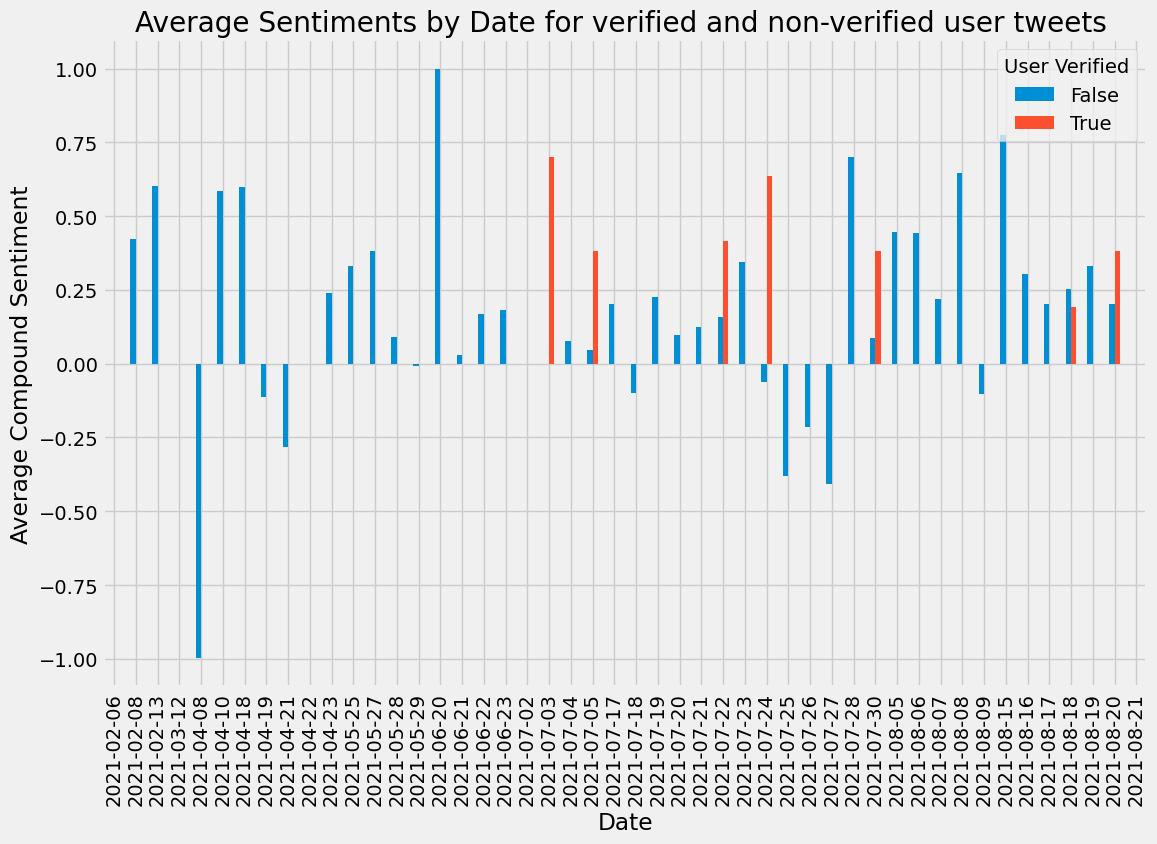

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and user_verified columns from new_df and calculate the mean
mean_sentiments = new_df.groupby(['date', 'user_verified'])
mean_sentiments = mean_sentiments['compound'].mean()

# Unstack the column user_verified
mean_sentiments = mean_sentiments.unstack('user_verified')

# Plot a bar chart with pandas
mean_sentiments.plot.bar(figsize=(12, 8))
plt.title('Average Sentiments by Date for verified and non-verified user tweets ')
plt.ylabel('Average Compound Sentiment')
plt.xlabel('Date')
plt.legend(title='User Verified', loc='upper right')
plt.show()


# WRITE UP
The Crypto sentiment analysis project delves into the exploration of a dataset comprising cryptocurrency-related tweets over a specific timeframe. The primary objective is to conduct sentiment analysis, discerning the prevailing sentiments within tweets. A key focus is on distinguishing sentiments between verified and non-verified users who boast a substantial following of over 10,000. This approach allows for a nuanced understanding of the sentiment landscape, particularly analyzing how influential and verified users contribute to the discourse. By identifying and comparing the frequency of negative sentiments in tweets from these distinct user categories, the project aims to uncover patterns and trends. The comprehensive analysis promises insights into the dynamics of sentiment expression within the crypto community, shedding light on the influence of key figures in shaping the overall sentiment narrative.